## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import os, json
from scipy.stats import skew
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
from sklearn.preprocessing import normalize, scale


from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
from sklearn.preprocessing import normalize, scale

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#since the main_category field is in the format of json
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

## READING THE DATASET

In [3]:
%%capture

# Download dataset
kickstarter_data = pd.read_csv('/Users/abraham.george.j/Desktop/UT/Courses/Business Data Science/Misc/aparna-temp-github/Final Project/Kickstarter_2018_11.csv', converters={'category':CustomParser}, error_bad_lines=False)


In [4]:
# Print the size of the dataset
print ("Number of rows:", kickstarter_data.shape[0])
print ("Number of columns: ", kickstarter_data.shape[1])

Number of rows: 206542
Number of columns:  37


In [5]:
kickstarter_data.shape

(206542, 37)

In [6]:
kickstarter_data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')


### Summary

The initial dataset has categorical and numerical variables. Before building our model,few other processes needs to followed.The process goes like :

**(1) Data cleaning**

**(2) Feature engineering**

**(3) Exploratory data analysis**

**(4) Building the model**



## Step 1 : DATA CLEANING

In [7]:
print("Data dimension before cleaning:", kickstarter_data.shape)

Data dimension before cleaning: (206542, 37)


In [8]:
cleaned_kickstarter_data = kickstarter_data.copy()

In [9]:
#only the necessary features which are required for predictions are taken
selected_features = ['backers_count',
                     'blurb',
                     'category',
                     'country',
                     'created_at',
                     'currency', 
                     'deadline',
                     'goal',
                     'launched_at',
                     'name',
                     'spotlight',
                     'staff_pick',
                     'state',
                     'usd_pledged',
                     'usd_type']

In [10]:
#get rid of uneccessary columns in training and testing
cleaned_kickstarter_data = cleaned_kickstarter_data[selected_features]

In [11]:
cleaned_kickstarter_data.head(3)

,backers_count,blurb,category,country,created_at,currency,deadline,goal,launched_at,name,spotlight,staff_pick,state,usd_pledged,usd_type
0,41,We are creating pop-up beer gardens using vint...,"{'id': 311, 'name': 'Food Trucks', 'slug': 'fo...",US,1403482635,USD,1410612852,25000.0,1408020852,COOKIES AND BEER,False,False,failed,12370.00000,domestic
1,28,A fine art print collection from 25 original d...,"{'id': 22, 'name': 'Illustration', 'slug': 'ar...",US,1317689791,USD,1322025449,1950.0,1319429849,"""Influential Figures"" Drawing Prints Box Set",True,True,successful,2412.27000,international
2,124,A science quest for the world beer diversity: ...,"{'id': 307, 'name': 'Drinks', 'slug': 'food/dr...",FR,1431862062,EUR,1435561200,10000.0,1432711420,"BeerDeCoded: the 1,000 beer genomes",True,True,successful,11796.65466,international


In [12]:
cleaned_kickstarter_data = cleaned_kickstarter_data.rename(columns={"name": "name_wtho_categ"})

In [13]:
cleaned_kickstarter_data.head(3)

,backers_count,blurb,category,country,created_at,currency,deadline,goal,launched_at,name_wtho_categ,spotlight,staff_pick,state,usd_pledged,usd_type
0,41,We are creating pop-up beer gardens using vint...,"{'id': 311, 'name': 'Food Trucks', 'slug': 'fo...",US,1403482635,USD,1410612852,25000.0,1408020852,COOKIES AND BEER,False,False,failed,12370.00000,domestic
1,28,A fine art print collection from 25 original d...,"{'id': 22, 'name': 'Illustration', 'slug': 'ar...",US,1317689791,USD,1322025449,1950.0,1319429849,"""Influential Figures"" Drawing Prints Box Set",True,True,successful,2412.27000,international
2,124,A science quest for the world beer diversity: ...,"{'id': 307, 'name': 'Drinks', 'slug': 'food/dr...",FR,1431862062,EUR,1435561200,10000.0,1432711420,"BeerDeCoded: the 1,000 beer genomes",True,True,successful,11796.65466,international


In [14]:
cleaned_kickstarter_data[sorted(cleaned_kickstarter_data['category'][0].keys())] = cleaned_kickstarter_data['category'].apply(pd.Series)

In [15]:
#Renaming all the columns
cleaned_kickstarter_data = cleaned_kickstarter_data.rename(columns={"name_wtho_categ": "name", "color": "category.id", "id": "category.name", "name": "category.slug",
                            "parent_id": "position", "position": "category.parent_id", "slug": "color"})

In [16]:
cleaned_kickstarter_data = cleaned_kickstarter_data.drop(['color', 'position', 'urls'], axis=1)

### Checking for missing values
It's easy to check for missing values by calling the isnull() method, and the sum() method off of that, to return a tally of all the True values that are returned by the isnull() method.

In [17]:
cleaned_kickstarter_data.isnull().sum()

backers_count             0
blurb                    10
category                  0
country                   0
created_at                0
currency                  0
deadline                  0
goal                      0
launched_at               0
name                      1
spotlight                 0
staff_pick                0
state                     0
usd_pledged               0
usd_type               2616
category.id               0
category.name             0
category.slug             0
category.parent_id    17362
dtype: int64

In [18]:
cleaned_kickstarter_data = cleaned_kickstarter_data.dropna()

In [19]:
cleaned_kickstarter_data.isnull().sum()

backers_count         0
blurb                 0
category              0
country               0
created_at            0
currency              0
deadline              0
goal                  0
launched_at           0
name                  0
spotlight             0
staff_pick            0
state                 0
usd_pledged           0
usd_type              0
category.id           0
category.name         0
category.slug         0
category.parent_id    0
dtype: int64

In [20]:
#select only data with known status
successful = cleaned_kickstarter_data['state'] == "successful"
failed = cleaned_kickstarter_data['state'] == "failed"
cancelled = cleaned_kickstarter_data['state'] == "cancelled"
suspended = cleaned_kickstarter_data['state'] == "suspended"


cleaned_kickstarter_data = cleaned_kickstarter_data.loc[failed | successful | cancelled | suspended]

In [21]:
#Convert argument given to_numeric to a numeric type
numerical_columns = ['usd_pledged',
                    'deadline',
                    'created_at',
                    'launched_at']
cleaned_kickstarter_data[numerical_columns] = cleaned_kickstarter_data[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [22]:
cleaned_kickstarter_data.isnull().sum()

backers_count         0
blurb                 0
category              0
country               0
created_at            0
currency              0
deadline              0
goal                  0
launched_at           0
name                  0
spotlight             0
staff_pick            0
state                 0
usd_pledged           0
usd_type              0
category.id           0
category.name         0
category.slug         0
category.parent_id    0
dtype: int64

In [23]:
#Convert argument given to to_datetime  to datetime
cleaned_kickstarter_data['created_at'] = pd.to_datetime(cleaned_kickstarter_data['created_at'],unit='s')
cleaned_kickstarter_data['launched_at'] = pd.to_datetime(cleaned_kickstarter_data['launched_at'],unit='s')
cleaned_kickstarter_data['deadline'] = pd.to_datetime(cleaned_kickstarter_data['deadline'],unit='s')

## Step 2 : FEATURE ENGINEERING
In order to gain a deeper understanding of Kickstarter environment and the drivers to successful campaigns, new features are intuitively engineered from current variables. The end results reduced the dataset to the following features:

* success: boolean feature indicating campaign (1) success (0) failure
* name_len: length of name of project
* desc_len: length of the short description or blurb
* state: successful, failed, cancelled, or suspended
* duration: days between creation and launch of campaign
* launched_at,created_at,deadline: month, wday (day of week), hour (hour of day)
* category:
* subcategory:
* country:
* staff_picked:
* goal:
* blurb_len_clean: length of the blurb
* category.id:
* category.name:
* category.slug:
* category.parent_id





In [24]:
# Considering only the successfull projects - therefore we are converting suspended, failed, cancelled, rejected projects to failed ones
cleaned_kickstarter_data['state'].replace('suspended','failed',inplace=True)

In [25]:
cleaned_kickstarter_data['category.slug'].head(3)

0    food/food trucks
1    art/illustration
2         food/drinks
Name: category.slug, dtype: object

## Comparing successful, failed and cancelled campaigns in terms of the length of blurb

In [26]:
cleaned_kickstarter_data['blurb_len_clean'] = cleaned_kickstarter_data['blurb'].map(str).apply(len)


In [27]:
cleaned_kickstarter_data['blurb_len_clean'].map(int)

0         135
1          94
2         134
3         134
4         134
5         134
6         132
7         134
8         133
9         131
10         51
11        131
12        128
13         96
14        135
15        135
16         56
17        133
18        129
19        104
20        124
21        121
23        123
25         90
26        105
27        125
28        135
29        132
30        134
31        128
         ... 
206508    135
206509    125
206510    123
206511    123
206513    131
206514    102
206515    121
206516    113
206517    126
206518    106
206519     94
206520    135
206521     98
206522     55
206523    133
206524    133
206525    133
206527    129
206528    127
206529    134
206531    102
206532    113
206534     53
206535    132
206536     92
206537    135
206538    113
206539    134
206540    134
206541     73
Name: blurb_len_clean, Length: 172676, dtype: int64

In [28]:
successful_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "successful"]
failed_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "failed"]
cancelled_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "canceled"]
print(len(successful_kickstarter)," successful campaigns")
print(len(failed_kickstarter)," failed campaigns")
print(len(cancelled_kickstarter)," cancelled campaigns")

97804  successful campaigns
74872  failed campaigns
0  cancelled campaigns


Ttest_indResult(statistic=-10.560716685268046, pvalue=4.615685568970473e-26)
Failed mean:  113.70827545677957
Successful mean:  115.00528608236883


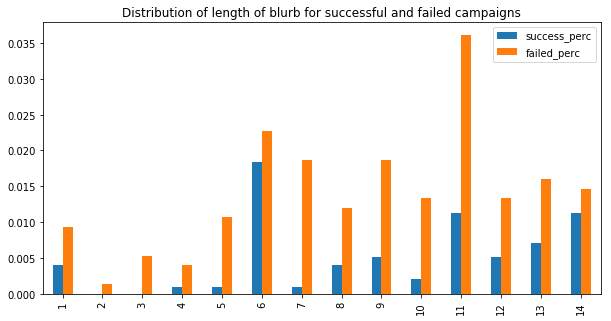

In [29]:
n = 'blurb_len_clean'
compare_blurb_len_clean = pd.concat([cleaned_kickstarter_data[n].value_counts(),successful_kickstarter[n].value_counts(),failed_kickstarter[n].value_counts(),cancelled_kickstarter[n].value_counts()], axis=1)
compare_blurb_len_clean.columns = ['all','successful','failed','cancelled']
compare_blurb_len_clean.loc['total'] = compare_blurb_len_clean.sum(axis=0)

def get_perc(val, col):
    return (val / compare_blurb_len_clean[col]['total'])*100

compare_blurb_len_clean['all_perc'] = compare_blurb_len_clean['all'].apply(get_perc, args=('all',))
compare_blurb_len_clean['success_perc'] = compare_blurb_len_clean['successful'].apply(get_perc, args=('successful',))
compare_blurb_len_clean['failed_perc'] = compare_blurb_len_clean['failed'].apply(get_perc, args=('failed',))
compare_blurb_len_clean['cancelled_perc'] = compare_blurb_len_clean['cancelled'].apply(get_perc, args=('cancelled',))

compare_blurb_len_clean[['success_perc','failed_perc']][:14].sort_index().plot(kind='bar',figsize=(10,5), title = "Distribution of length of blurb for successful and failed campaigns")

print(ttest_ind(failed_kickstarter[n], successful_kickstarter[n]))
print("Failed mean: ", failed_kickstarter[n].mean())
print("Successful mean: ", successful_kickstarter[n].mean())

## Does any success has any relation with weekday ??

In [47]:
#Categories is initially a json datatype. We need to split that into id,name slug etc
cleaned_kickstarter_data['catg.type'], cleaned_kickstarter_data['catg.subtype'] = cleaned_kickstarter_data['category.slug'].str.split('/', 1).str


#Gives the total number of successful projects    
cleaned_kickstarter_data['state_num'] = cleaned_kickstarter_data['state'].apply(lambda x: 1 if x=='successful' else 0)

cleaned_kickstarter_data['launched_at_hr'] = cleaned_kickstarter_data['launched_at'].apply(lambda x: x.hour) + 1
cleaned_kickstarter_data['launched_at_day'] = cleaned_kickstarter_data['launched_at'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
cleaned_kickstarter_data['launched_at_month'] = cleaned_kickstarter_data['launched_at'].apply(lambda x: x.month)
cleaned_kickstarter_data['launched_at_year'] = cleaned_kickstarter_data['launched_at'].apply(lambda x: x.year)
    
cleaned_kickstarter_data['deadline_hr'] = cleaned_kickstarter_data['deadline'].apply(lambda x: x.hour) + 1
cleaned_kickstarter_data['deadline_day'] = cleaned_kickstarter_data['deadline'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
cleaned_kickstarter_data['deadline_month'] = cleaned_kickstarter_data['deadline'].apply(lambda x: x.month)
cleaned_kickstarter_data['deadline_year'] = cleaned_kickstarter_data['deadline'].apply(lambda x: x.year)
    
cleaned_kickstarter_data['created_at_hr'] = cleaned_kickstarter_data['created_at'].apply(lambda x: x.hour) + 1
cleaned_kickstarter_data['created_at_day'] = cleaned_kickstarter_data['created_at'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
cleaned_kickstarter_data['created_at_month'] = cleaned_kickstarter_data['created_at'].apply(lambda x: x.month)
cleaned_kickstarter_data['created_at_year'] = cleaned_kickstarter_data['created_at'].apply(lambda x: x.year)

In [48]:
# To compare creation to launch 
cleaned_kickstarter_data['launched-created'] = (cleaned_kickstarter_data.launched_at - cleaned_kickstarter_data.created_at).dt.components.days

    

In [62]:
# To compare launch to deadline
cleaned_kickstarter_data['deadline-launched'] = (cleaned_kickstarter_data.deadline - cleaned_kickstarter_data.launched_at).dt.components.days

In [63]:
successful_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "successful"]
failed_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "failed"]
cancelled_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "canceled"]


In [64]:
def week_distribution(val):
    if val < 7:
        return "< 1 week"
    elif val < 14:
        return "1-2 weeks"
    elif val < 28:
        return "2-4 weeks"
    elif val < 35:
        return "4-5 weeks"
    elif val < 42:
        return "5-6 weeks"
    elif val < 56:
        return "6-8 weeks"
    else:
        return "8+ weeks"


In [65]:
def day_distribution(val):
    if val < 1:
        return "0-1 day"
    elif val < 2:
        return "01-2 days"
    elif val < 7:
        return "02-7 days"
    elif val < 21:
        return "07-21 days"
    elif val < 42:
        return "21-42 days"
    elif val < 63:
        return "42-63 days"
    else:
        return "63+ days"

In [66]:

between_launched_created = pd.concat([cleaned_kickstarter_data['launched-created'].apply(day_distribution).value_counts(),successful_kickstarter['launched-created'].apply(day_distribution).value_counts(),failed_kickstarter['launched-created'].apply(day_distribution).value_counts(),cancelled_kickstarter['launched-created'].apply(day_distribution).value_counts()], axis=1)
between_launched_created.columns = ['all','successful','failed','cancelled']
between_launched_created.loc['total'] = between_launched_created.sum(axis=0)

between_launched_created['all_perc'] = between_launched_created['all'].apply(get_perc, args=('all',))
between_launched_created['success_perc'] = between_launched_created['successful'].apply(get_perc, args=('successful',))
between_launched_created['failed_perc'] = between_launched_created['failed'].apply(get_perc, args=('failed',))
between_launched_created['cancelled_perc'] = between_launched_created['cancelled'].apply(get_perc, args=('cancelled',))


In [67]:
successful_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "successful"]
failed_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "failed"]
cancelled_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "canceled"]



In [68]:

between_launched_deadline = pd.concat([cleaned_kickstarter_data['deadline-launched'].apply(week_distribution).value_counts(),successful_kickstarter['deadline-launched'].apply(week_distribution).value_counts(),failed_kickstarter[n].apply(week_distribution).value_counts(),cancelled_kickstarter['deadline-launched'].apply(week_distribution).value_counts()], axis=1)

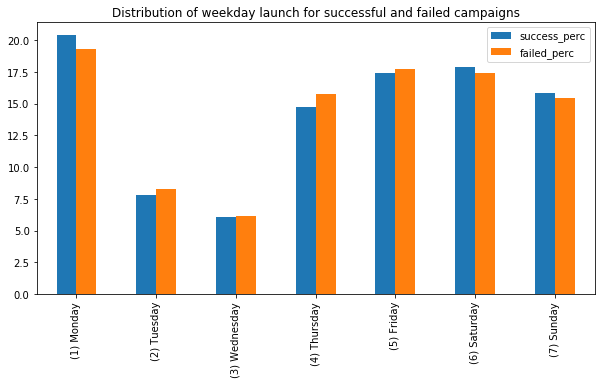

In [69]:
# Launched weekday distribution by state
launched_deadline_df = pd.concat([successful_kickstarter['launched_at_day'].value_counts(), failed_kickstarter['launched_at_day'].value_counts()], axis=1)
launched_deadline_df.columns = ['successful','failed']
between_launched_deadline.loc['total'] = between_launched_created.sum(axis=0)

launched_deadline_df['success_perc'] = launched_deadline_df['successful'].apply(get_perc, args=('successful',))
launched_deadline_df['failed_perc'] = launched_deadline_df['failed'].apply(get_perc, args=('failed',))
launched_deadline_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
launched_deadline_df = launched_deadline_df.sort_index()

launched_deadline_df[['success_perc','failed_perc']].plot(kind='bar', figsize=(10,5), title = "Distribution of weekday launch for successful and failed campaigns")

### Distribution of projects in different categories

From this analysis, we concluded that projects related to categories like :

**(1) Film & Video**
**(2) Technology**
**(3) Music**
**(4) Art** had high success rate.

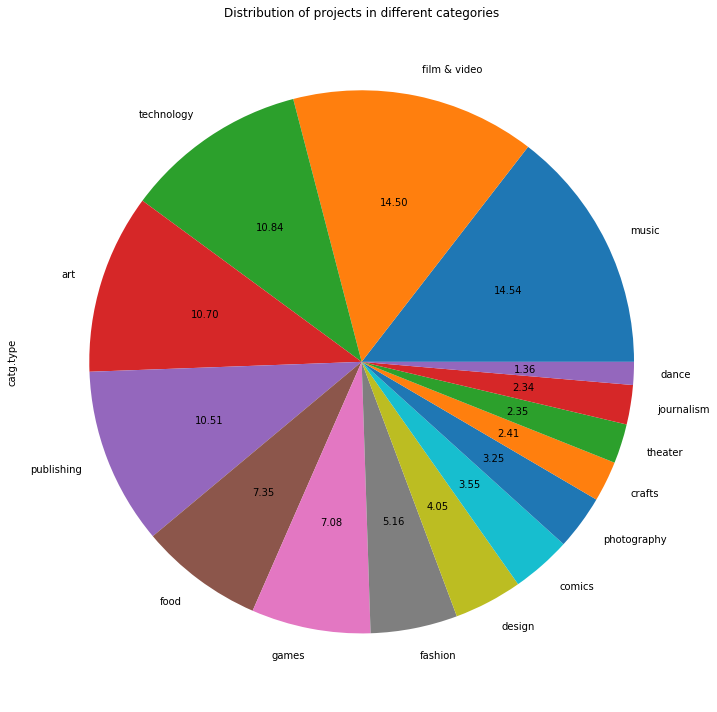

In [70]:
cleaned_kickstarter_data['catg.type'].value_counts().plot.pie(autopct='%.2f',figsize=(10,10))
plt.title('Distribution of projects in different categories')
plt.tight_layout()

### Counts in campaigns from 2009 to 2018 grouped by month ( In graph plot)

In [75]:
cleaned_kickstarter_data['count'] = 1

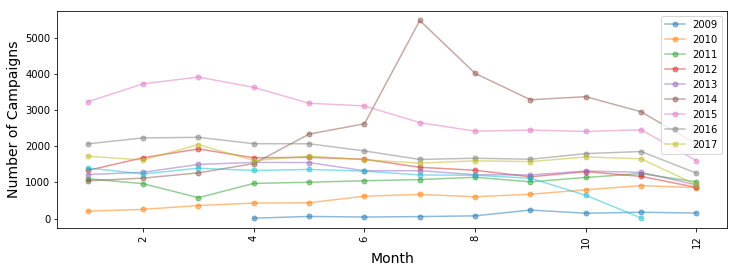

In [76]:
def plot_monthly_campaign_count(n):
    
    mth = cleaned_kickstarter_data[cleaned_kickstarter_data['launched_at_year'] == n]
    mth_cnt = mth.groupby('launched_at_month').count()['count']
    mth_cnt.plot(marker='o', markersize=5, alpha=.5, rot=90)

fig = plt.figure(figsize=(12, 4))
for i in range(2009, 2019):
    plot_monthly_campaign_count(i)
plt.ylabel('Number of Campaigns', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.legend(range(2009, 2018))
plt.show()

### Counts in campaigns from 2009 to 2018 grouped by month ( In tabular form)

In [78]:
pd.crosstab(cleaned_kickstarter_data.launched_at_month, cleaned_kickstarter_data.launched_at_year)

launched_at_year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
launched_at_month,,,,,,,,,,
1,0,205,1101,1331,1216,1044,3228,2065,1723,1399
2,0,254,965,1682,1280,1118,3726,2230,1620,1235
3,0,360,577,1925,1496,1264,3912,2246,2044,1392
4,11,428,972,1681,1553,1520,3627,2070,1604,1329
5,59,437,1004,1692,1548,2335,3188,2068,1729,1358
6,42,619,1045,1640,1322,2620,3114,1869,1624,1312
7,55,666,1078,1418,1324,5476,2653,1635,1533,1206
8,75,604,1142,1335,1214,4014,2416,1668,1597,1198
9,235,673,1016,1155,1207,3284,2446,1640,1575,1115


## Step 3 : EXPLORATORY DATA ANALYSIS

### Target Variable: Success

Text(0.5,1,'Distribution of successful (1)/failed (0) projects')

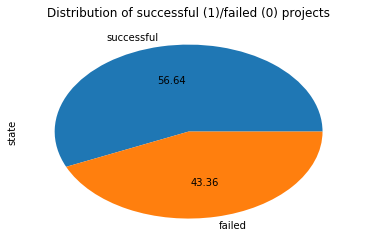

In [79]:
cleaned_kickstarter_data['state'].value_counts().plot.pie(autopct='%.2f')
plt.title('Distribution of successful (1)/failed (0) projects')

In [80]:
successful_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "successful"]
failed_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "failed"]
cancelled_kickstarter = cleaned_kickstarter_data[cleaned_kickstarter_data['state'] == "canceled"]

print(len(successful_kickstarter)," successful campaigns")
print(len(failed_kickstarter)," failed campaigns")
print(len(cancelled_kickstarter)," cancelled campaigns")

97804  successful campaigns
74872  failed campaigns
0  cancelled campaigns


### What failure rate does a goal above 50K have?

In [81]:
print("Number of successful kickstarters with goal over 50k:", len(successful_kickstarter[successful_kickstarter['goal'] >= 50000]))
print("Number of successful kickstarters with goal under 50k:", len(successful_kickstarter[successful_kickstarter['goal'] < 50000]))
print("Number of failed kickstarters with goal over 50k:", len(failed_kickstarter[failed_kickstarter['goal'] >= 50000]))
print("Number of failed kickstarters with goal over 50k:", len(failed_kickstarter[failed_kickstarter['goal'] < 50000]))

print("Success mean:", successful_kickstarter['goal'].median())
print("Failed mean:", failed_kickstarter['goal'].median())

Number of successful kickstarters with goal over 50k: 3921
Number of successful kickstarters with goal under 50k: 93883
Number of failed kickstarters with goal over 50k: 11049
Number of failed kickstarters with goal over 50k: 63823
Success mean: 3500.0
Failed mean: 7000.0


### What percentage of successful campaigns are "staff picks" vs failed/cancelled campagins?

In [82]:
print("Successful campaigns % staff picks")
print(len(successful_kickstarter[successful_kickstarter['staff_pick'] == 1])/(float(len(successful_kickstarter))*100))
print(len(successful_kickstarter[successful_kickstarter['staff_pick'] == 1]))

print("Failed campaigns % staff picks")
print(len(failed_kickstarter[failed_kickstarter['staff_pick'] == 1])/(float(len(failed_kickstarter))*100))
print(len(failed_kickstarter[failed_kickstarter['staff_pick'] == 1]))

Successful campaigns % staff picks
0.002148173898818044
21010
Failed campaigns % staff picks
0.0003464579549097126
2594


### Build a correlation matrix to help identify variables

In [83]:
corrdf = cleaned_kickstarter_data.corr()

corrdf

,backers_count,goal,spotlight,staff_pick,usd_pledged,category.id,category.parent_id,blurb_len_clean,state_num,launched_at_hr,...,deadline_month,deadline_year,created_at_hr,created_at_day,created_at_month,created_at_year,launched-created,deadline_launched,deadline-launched,count
backers_count,1.000000,0.010781,0.110821,0.151291,0.811963,-0.041442,0.006362,0.000771,0.110821,-0.004417,...,-0.002154,-0.019821,0.002640,-0.005334,-0.007671,-0.022357,0.022834,0.005116,0.005116,NaN
goal,0.010781,1.000000,-0.033658,-0.005829,0.011811,0.021537,0.002359,-0.004355,-0.033658,0.001280,...,-0.001130,0.016962,-0.002370,0.008476,0.002557,0.015672,0.002367,0.024570,0.024570,NaN
spotlight,0.110821,-0.033658,1.000000,0.259916,0.104550,-0.338288,-0.052189,0.025406,1.000000,-0.015345,...,-0.010299,-0.188444,0.019427,-0.021518,-0.021912,-0.187711,0.019175,-0.084781,-0.084781,NaN
staff_pick,0.151291,-0.005829,0.259916,1.000000,0.143109,-0.058175,-0.024069,0.025416,0.259916,-0.005850,...,0.016901,-0.060545,0.015081,-0.014295,0.007524,-0.066108,0.050205,-0.007480,-0.007480,NaN
usd_pledged,0.811963,0.011811,0.104550,0.143109,1.000000,-0.017646,0.017156,0.007266,0.104550,-0.005189,...,-0.000445,-0.007795,0.001301,-0.009225,-0.007128,-0.010589,0.023991,0.016790,0.016790,NaN
category.id,-0.041442,0.021537,-0.338288,-0.058175,-0.017646,1.000000,0.216258,-0.010152,-0.338288,0.014139,...,0.036682,0.529084,-0.008273,0.011660,0.013355,0.527439,0.024004,-0.051975,-0.051975,NaN
category.parent_id,0.006362,0.002359,-0.052189,-0.024069,0.017156,0.216258,1.000000,0.016830,-0.052189,-0.000462,...,0.000992,0.029139,-0.005603,0.005080,0.013138,0.026351,0.004155,0.032037,0.032037,NaN
blurb_len_clean,0.000771,-0.004355,0.025406,0.025416,0.007266,-0.010152,0.016830,1.000000,0.025406,-0.012134,...,-0.008336,-0.066819,0.004452,-0.003927,-0.002183,-0.068883,0.004384,0.049142,0.049142,NaN
state_num,0.110821,-0.033658,1.000000,0.259916,0.104550,-0.338288,-0.052189,0.025406,1.000000,-0.015345,...,-0.010299,-0.188444,0.019427,-0.021518,-0.021912,-0.187711,0.019175,-0.084781,-0.084781,NaN
launched_at_hr,-0.004417,0.001280,-0.015345,-0.005850,-0.005189,0.014139,-0.000462,-0.012134,-0.015345,1.000000,...,0.009604,0.012791,0.100385,-0.011270,0.005577,0.015401,-0.009824,-0.022821,-0.022821,NaN


### Kickstarter is predominantly domestic



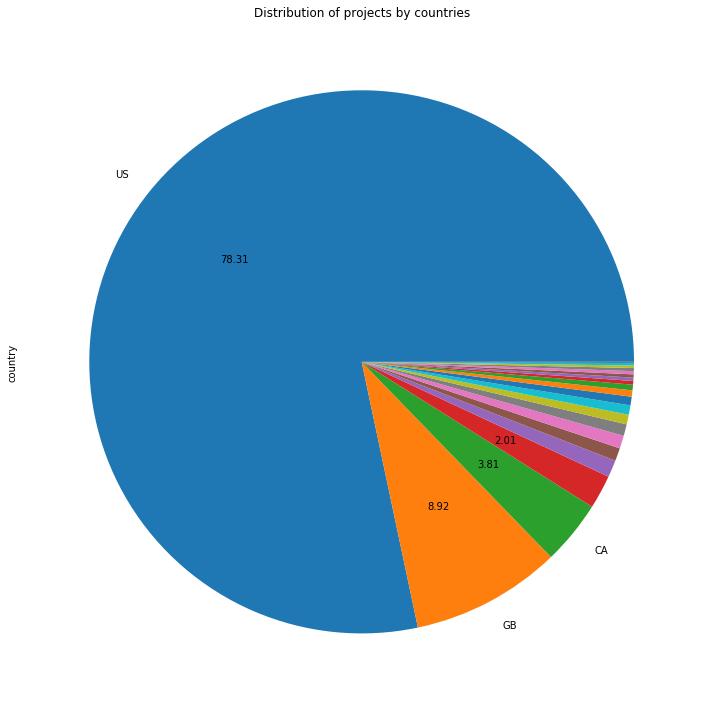

In [84]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''

labels = ['US', 'GB', 'CA'] + ["" for x in range(19)]

cleaned_kickstarter_data['country'].value_counts().plot.pie(autopct=my_autopct,labels=labels,figsize=(10,10))
plt.title('Distribution of projects by countries')
plt.tight_layout()

In [85]:
cleaned_kickstarter_data.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'currency', 'deadline', 'goal', 'launched_at', 'name', 'spotlight',
       'staff_pick', 'state', 'usd_pledged', 'usd_type', 'category.id',
       'category.name', 'category.slug', 'category.parent_id',
       'blurb_len_clean', 'catg.type', 'catg.subtype', 'state_num',
       'launched_at_hr', 'launched_at_day', 'launched_at_month',
       'launched_at_year', 'deadline_hr', 'deadline_day', 'deadline_month',
       'deadline_year', 'created_at_hr', 'created_at_day', 'created_at_month',
       'created_at_year', 'launched-created', 'deadline_launched',
       'deadline-launched', 'count'],
      dtype='object')

### Setting the right goal is very important!!


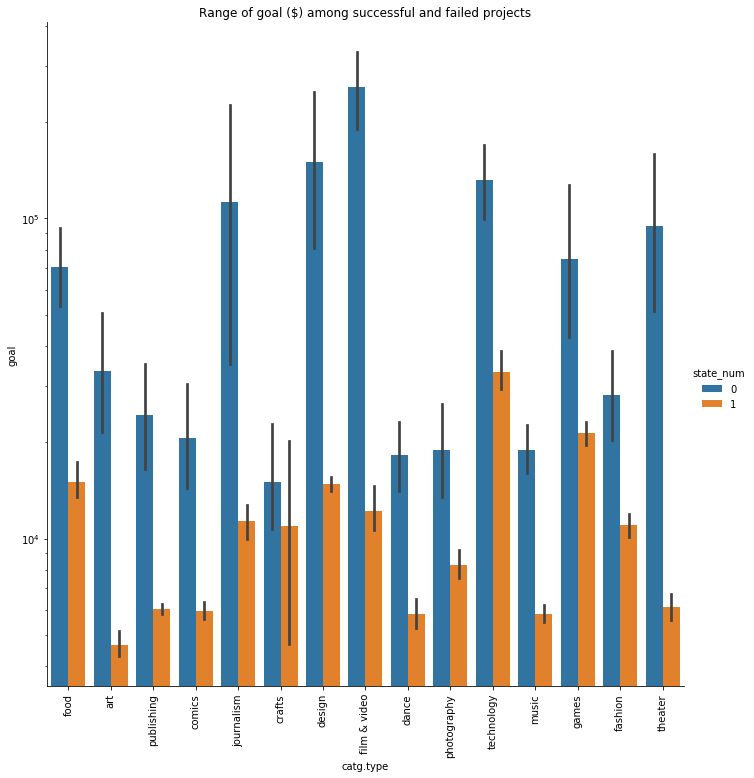

In [87]:
sns.factorplot(x='catg.type', y='goal', hue='state_num', kind='bar', data=cleaned_kickstarter_data, size=10)
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title('Range of goal ($) among successful and failed projects')
plt.gca().set_yscale("log", nonposy='clip');

## Step 4 : BUILDING THE MODELS
In the search for the best model, four algorithms were investigated:

* **Random Forest**
* **Adaptive Boosting**
* **Gradient Boosting**
* **Logistic Regression**

These classification models were chosen due to their predictive power in binary classification problems. Adaptive and Gradient Boosting are both boosting methods which choose to train one strong learner (the overfitting decision tree) on multiple weak learners (underfitting learners) in sequence.

To avoid overfitting due to our limited dataset, functions for cross-validation and parameter optimization were defined such that they are applicable on either classification or regression algorithm



### K Fold Cross Validation:

This function (**fitting_of_model**) train the model given as 'alg' by performing cross-validation. It works on both regression and classification

* **alg**: sklearn model
* **dtrain**: pandas.DataFrame, training set
* **predictors**: list, labels of features (column names) to be used in the model training
* **target**: str, target variable
* **scoring_method**: str, method to be used by the cross-validation to valuate the model
* **performCV**: bool, perform Cv or not
* **printFeatureImportance**: bool, plot histogram of features importance or not
* **cv_folds**: int, degree of cross-validation

In [88]:
%%capture
# import scikit learn libraries
from sklearn import cross_validation, metrics   #model optimization and valuation tools
from sklearn.grid_search import GridSearchCV   #Perforing grid search

# define a function that help to train models and perform cv
def fitting_of_model(alg,dtrain,predictors,target,scoring_method,performCV=True,printFeatureImportance=True,cv_folds=5):

    # train the algorithm on data
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict on train set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    if scoring_method == 'roc_auc':
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=cv_folds,scoring=scoring_method)
        
        #print model report
        print ("\nModel report:")
        if scoring_method == 'roc_auc':
            print ("Accuracy: %.4f" % metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
            print ("Precision: %.4f" % metrics.precision_score(dtrain[target].values,dtrain_predictions))
            print ("Recall: %.4f" % metrics.recall_score(dtrain[target].values,dtrain_predictions))
            print ("AUC Score (Train): %.4f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
        if (scoring_method == 'mean_squared_error'):
            print ("Accuracy: %.4f" % metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    if performCV:
        print ("CV Score: Mean : %.5g | Std : %.5g | Min : %.5g | Max : %.5g \n" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #print feature importance
    if printFeatureImportance:
        if dir(alg)[0] == '_Booster': #runs only if alg is xgboost
            feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        else:
            feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances')
        plt.ylabel('Feature Importe Score')
        plt.show()

### Optimize Number of Desicion Trees:

This function, (**parameter_optimization**), is used to tune paremeters of a predictive algorithm

* **alg**: sklearn model
* **param_test**: dict, parameters to be tuned
* **scoring_method**: str, method to be used by the cross-validation to valuate the model
* **train**: pandas.DataFrame, training data
* **predictors**: list, labels to be used in the model training process. They should be in the column names of dtrain
* **target**: str, target variable

In [89]:
# optimize n_estimator through grid search
def parameter_optimization(alg,param_test,scoring_method,train,predictors,target):
    gsearch = GridSearchCV(estimator=alg, param_grid = param_test, scoring=scoring_method,n_jobs=2,iid=False,cv=5)
    gsearch.fit(train[predictors],train[target])
    
    return gsearch


### Splitting The Data: Train and Test

In [92]:
cleaned_kickstarter_data.shape


(172676, 39)

In [100]:
cleaned_kickstarter_data['success'] = (cleaned_kickstarter_data['state'] == 'successful')

In [101]:
train = cleaned_kickstarter_data.copy() # make a copy of the training set
# since the dataset is too big for my system, select a small sample size to carry on training and 5 folds cross validation
train = train.loc[np.random.choice(train.index,size=62686,replace=False)]
target = 'success' # set target variable - it will be used later in optimization

# test
indices = cleaned_kickstarter_data.index[~cleaned_kickstarter_data.index.isin(train.index)]
test = cleaned_kickstarter_data.loc[np.random.choice(indices,size=100000,replace=False)]

### Choosing the predictors

In [102]:

predictors = ['category.parent_id',
              'category.id',
              'goal',
              'staff_pick',
              'launched_at_hr',
              'launched_at_day',
              'deadline_hr',
              'deadline_day',
              'launched-created',
              'deadline-launched']

# Random Forest

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):
    Category.id
    Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**


Search grid results:
params (best): 110
score (best): 0.8238

Model report:
Accuracy: 0.7399
Precision: 0.7593
Recall: 0.7930
AUC Score (Train): 0.8261
CV Score: Mean : 0.82381 | Std : 0.0024627 | Min : 0.82158 | Max : 0.82721 



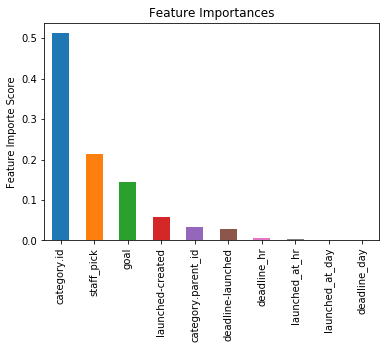

In [103]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# optimize n_estimator through grid search
parameter = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
RandomForest_model = RandomForestClassifier(
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    random_state = 10)

# get results of the search grid
RandomForest_results = parameter_optimization(RandomForest_model,parameter,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", RandomForest_results.best_params_['n_estimators']) 
print("score (best): %.4f" % RandomForest_results.best_score_)

# cross validate the best model with optimized number of estimators
fitting_of_model(RandomForest_results.best_estimator_,train,predictors,target,'roc_auc')
     

#### Let’s test it by doing prediction on a test dataset



In [104]:
RandomForest_prediction = RandomForest_results.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(RandomForest_prediction,test.success))

ROC AUC: 0.7358 


# Gradient Boosting

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):
* Category.id
* Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**


Search grid results:
params (best): 150
score (best): 0.8841

Model report:
Accuracy: 0.8094
Precision: 0.8363
Recall: 0.8256
AUC Score (Train): 0.8997
CV Score: Mean : 0.8841 | Std : 0.0014426 | Min : 0.8827 | Max : 0.88663 



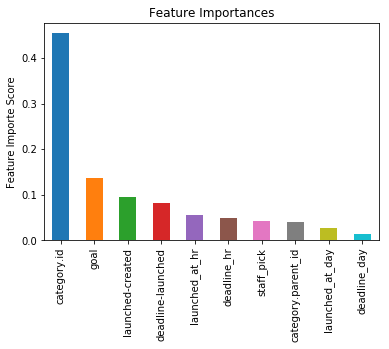

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

# optimize n_estimator through grid search
parameter = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
GradientBoosting_model = GradientBoostingClassifier(
    learning_rate=0.1, # use default
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    subsample=0.8, # try <1 to decrease variance and increase bias
    random_state = 10)

# get results of the search grid
GradientBoosting_results = parameter_optimization(GradientBoosting_model,parameter,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", GradientBoosting_results.best_params_['n_estimators']) 
print("score (best): %.4f" % GradientBoosting_results.best_score_)

# cross validate the best model with optimized number of estimators
fitting_of_model(GradientBoosting_results.best_estimator_,train,predictors,target,'roc_auc')
     


#### Let’s test it by doing prediction on a test dataset

In [106]:
GradientBoosting_prediction = GradientBoosting_results.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(GradientBoosting_prediction,test.success))

ROC AUC: 0.7903 


# Adaptive Boosting

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):
* Category.id
* Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**




Search grid results:
params (best): 150
score (best): 0.8275

Model report:
Accuracy: 0.7500
Precision: 0.7685
Recall: 0.8005
AUC Score (Train): 0.8283
CV Score: Mean : 0.82751 | Std : 0.0025458 | Min : 0.82469 | Max : 0.83094 



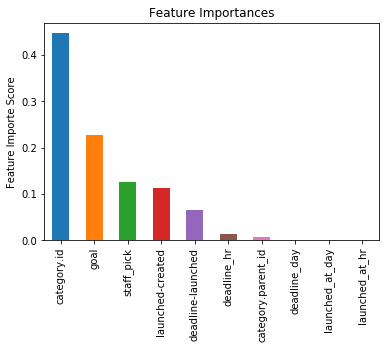

In [107]:
from sklearn.ensemble import AdaBoostClassifier

# optimize n_estimator through grid search
parameter = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
AdaBoost_model = AdaBoostClassifier(
    learning_rate=0.1, # use default
    random_state = 10)

# get results of the search grid
AdaBoost_results = parameter_optimization(AdaBoost_model,parameter,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", AdaBoost_results.best_params_['n_estimators']) 
print("score (best): %.4f" % AdaBoost_results.best_score_)

# cross validate the best model with optimized number of estimators
fitting_of_model(AdaBoost_results.best_estimator_,train,predictors,target,'roc_auc')
     


#### Let’s test it by doing prediction on a test dataset

In [108]:
AdaBoost_prediction = AdaBoost_results.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(AdaBoost_prediction,test.success))

ROC AUC: 0.7472 


# Logistic Regression

* Optimized predictors (in order of importance):
* Category.id
* Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**

In [109]:
from sklearn.linear_model import LogisticRegression

# optimize n_estimator through grid search
parameter = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
LogisticRegression_model = LogisticRegression()

# cross validate the best model with optimized number of estimators
fitting_of_model(LogisticRegression_model,train,predictors,target,'roc_auc',printFeatureImportance=False)
     



Model report:
Accuracy: 0.6480
Precision: 0.7042
Recall: 0.6544
AUC Score (Train): 0.6911
CV Score: Mean : 0.68796 | Std : 0.010903 | Min : 0.67134 | Max : 0.70286 



#### Let’s test it by doing prediction on a test dataset

In [110]:
LogisticRegression_prediction = LogisticRegression_model.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(LogisticRegression_prediction,test.success))

ROC AUC: 0.6474 


# XGBoost by Category.parent_id

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):
* Category.id
* Goal
* ROC-AUC of test: TBD

**Firstly, let's optimize and train the model**

In [111]:
values = cleaned_kickstarter_data['catg.type'].unique()
keys = cleaned_kickstarter_data['category.parent_id'].unique()

xgb_dictionary = dict(zip(keys, values))

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

def fitting_per_category(mytrain,category):
    
    train = mytrain.loc[mytrain['category.parent_id'] == category]

    print ("Optimizing the classifier...")

    tic = dt.datetime.now() # initiate the timing

    # optimize n_estimator through grid search
    parameters = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

    # initiate classification model
    XGB_model = GradientBoostingClassifier(
        learning_rate=0.1, # use default
        min_samples_split=2,# use default
        max_depth=5,
        max_features='auto',
        subsample=0.8, # try <1 to decrease variance and increase bias
        random_state = 10)

    # get results of the search grid
    XGB_results = parameter_optimization(XGB_model,parameters,'roc_auc',train,predictors,target)
    print("\nSearch grid results:")
    print("params (best):", XGB_results.best_params_['n_estimators']) 
    print("score (best): %.4f" % XGB_results.best_score_)
    
    values = cleaned_kickstarter_data['catg.type'].unique()
    keys = cleaned_kickstarter_data['category.parent_id'].unique()

    dictionary = dict(zip(keys, values))
    
    print("\nCategory:" + dictionary[category] + "\n")

    # cross validate the best model with optimized number of estimators
    fitting_of_model(XGB_results.best_estimator_,train,predictors,target,'roc_auc',printFeatureImportance=False)

    print ("\n Processing time:", dt.datetime.now()-tic)
    
    print ("\nTesting the classifier...\n")
    
    XGB_predictions = XGB_results.best_estimator_.predict(test[predictors])
    
    print ("TEST Accuracy: %.4f" % metrics.accuracy_score(XGB_predictions,test.success))
    print ("TEST Precision: %.4f" % metrics.precision_score(XGB_predictions,test.success))
    print ("TEST Recall: %.4f" % metrics.recall_score(XGB_predictions,test.success))
    print ("TEST AUC Score (Train): %.4f" % metrics.roc_auc_score(XGB_predictions,test.success))
    
    print("\n--------------------------------------------------------------------\n\n\n")

#### See the cross validated results for every category

In [119]:
for i in xgb_dictionary:
    fitting_per_category(train,i)

Optimizing the classifier...

Search grid results:
params (best): 30
score (best): 0.8017

Category:food


Model report:
Accuracy: 0.8120
Precision: 0.8182
Recall: 0.4030
AUC Score (Train): 0.8667
CV Score: Mean : 0.80175 | Std : 0.010299 | Min : 0.78957 | Max : 0.81471 


 Processing time: 0:00:08.412837

Testing the classifier...

TEST Accuracy: 0.5328
TEST Precision: 0.2103
TEST Recall: 0.8507
TEST AUC Score (Train): 0.6660

--------------------------------------------------------------------



Optimizing the classifier...

Search grid results:
params (best): 50
score (best): 0.7842

Category:art


Model report:
Accuracy: 0.7675
Precision: 0.7732
Recall: 0.8404
AUC Score (Train): 0.8533
CV Score: Mean : 0.78416 | Std : 0.0098753 | Min : 0.77106 | Max : 0.79929 


 Processing time: 0:00:11.621595

Testing the classifier...

TEST Accuracy: 0.6945
TEST Precision: 0.6378
TEST Recall: 0.7814
TEST AUC Score (Train): 0.7007

----------------------------------------------------------------

## Step 5 : EVALUATION

In [157]:
from sklearn import metrics

def ROC_Evaluation(mydata, model):
    
    cleaned_kickstarter_data_new = mydata.copy()
    
    
    probs = model.best_estimator_.predict_proba(cleaned_kickstarter_data_new[predictors])
    pred = model.best_estimator_.predict(cleaned_kickstarter_data_new[predictors])

    MODP = pd.DataFrame(data=probs)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = metrics.roc_curve(cleaned_kickstarter_data_new.success,MODP.values[0:,1])
    roc_auc = metrics.auc(fpr, tpr)

    # Plot ROC-AUC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    print('ROC AUC =', roc_auc)



In [158]:
from sklearn.metrics import confusion_matrix

def evaluation_scores(actual,pred):
    
    cm = confusion_matrix(actual,pred)
    
    print('Confusion Matrix : \n', cm, '\n')
    
    total = sum(sum(cm))
    
    # from confusion matrix calculate scores
    
    accuracy=(cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])

    print('Accuracy : ', accuracy)
    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)

Confusion Matrix : 
 [[33322 10160]
 [10452 46066]] 

Accuracy :  0.79388
Sensitivity :  0.7663400947518514
Specificity :  0.8150677660214445


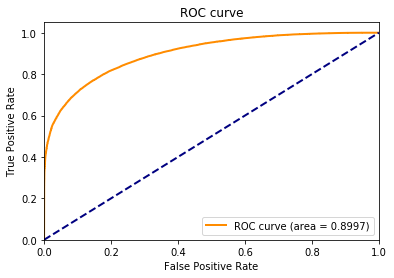

ROC AUC = 0.8996548897276941


In [159]:
evaluation_scores(test.success,GradientBoosting_prediction)
ROC_Evaluation(train, GradientBoosting_results)


Confusion Matrix : 
 [[29162 14320]
 [11700 44818]] 

Accuracy :  0.7398
Sensitivity :  0.6706683225242629
Specificity :  0.7929863052478856


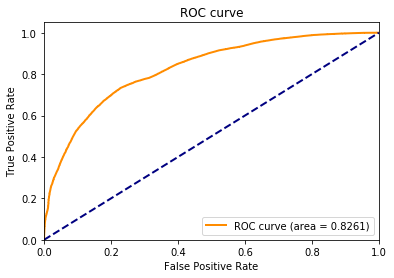

ROC AUC = 0.8261313891565286


In [160]:
evaluation_scores(test.success,RandomForest_prediction)
ROC_Evaluation(train, RandomForest_results)

Confusion Matrix : 
 [[29777 13705]
 [11202 45316]] 

Accuracy :  0.75093
Sensitivity :  0.6848121061588703
Specificity :  0.8017976573834884


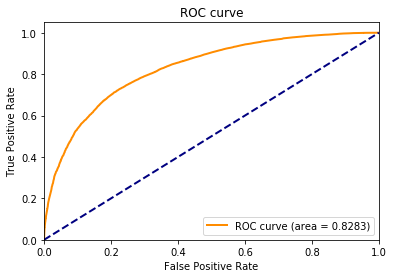

ROC AUC = 0.8283393457481445


In [161]:
evaluation_scores(test.success,AdaBoost_prediction)
ROC_Evaluation(train, AdaBoost_results)

In [156]:
evaluation_scores(test.success,LogisticRegression_prediction)

Confusion Matrix : 
 [[27919 15563]
 [19394 37124]] 

Accuracy :  0.65043
Sensitivity :  0.6420817809668369
Specificity :  0.6568526841006405
